In [1]:
import pandas as pd

train_df = pd.read_csv("./data/rainfall_train.csv")
test_df = pd.read_csv("./data/rainfall_test.csv")

train_df = train_df.drop(columns=['Unnamed: 0', 'rainfall_train.fc_year', 'rainfall_train.fc_month',
       'rainfall_train.fc_day', 'rainfall_train.fc_hour'])
test_df = test_df.drop(columns=['Unnamed: 0', 'rainfall_test.fc_year', 'rainfall_test.fc_month',
       'rainfall_test.fc_day', 'rainfall_test.fc_hour'])

**모든 날짜에 대해서 중복된 DH 변수 제거**

In [2]:
tmp = train_df.groupby(by=["rainfall_train.stn4contest","rainfall_train.ef_year","rainfall_train.ef_month","rainfall_train.ef_day","rainfall_train.ef_hour"])["rainfall_train.dh"].min().reset_index()
tmp.columns = ["rainfall_train.stn4contest","rainfall_train.ef_year","rainfall_train.ef_month","rainfall_train.ef_day","rainfall_train.ef_hour", "flag"]
train_df = pd.merge(train_df,tmp,"left",on=["rainfall_train.stn4contest","rainfall_train.ef_year","rainfall_train.ef_month","rainfall_train.ef_day","rainfall_train.ef_hour"])
train_df = train_df[train_df["rainfall_train.dh"] == train_df["flag"]]

## 학습/테스트 데이터 시간/공간적 범위 분석

### 시간적 범위 분석

**년도(rainfall_ef_year)**

In [3]:
train_df["rainfall_train.ef_year"].unique()

array(['A', 'B', 'C'], dtype=object)

In [4]:
test_df["rainfall_test.ef_year"].unique()

array(['D'], dtype=object)

### 공간적 범위 분석


**지점(rainfall_train.stn4contest)**

In [5]:
train_df["rainfall_train.stn4contest"].unique()

array(['STN001', 'STN002', 'STN003', 'STN004', 'STN005', 'STN006',
       'STN007', 'STN008', 'STN009', 'STN010', 'STN011', 'STN012',
       'STN013', 'STN014', 'STN015', 'STN016', 'STN017', 'STN018',
       'STN019', 'STN020'], dtype=object)

In [6]:
test_df["rainfall_test.stn4contest"].unique()

array(['STN031', 'STN032', 'STN033', 'STN034', 'STN035'], dtype=object)

## 년도/지점이 주는 영향도 분석


### 지점별 실 강수량 평균값


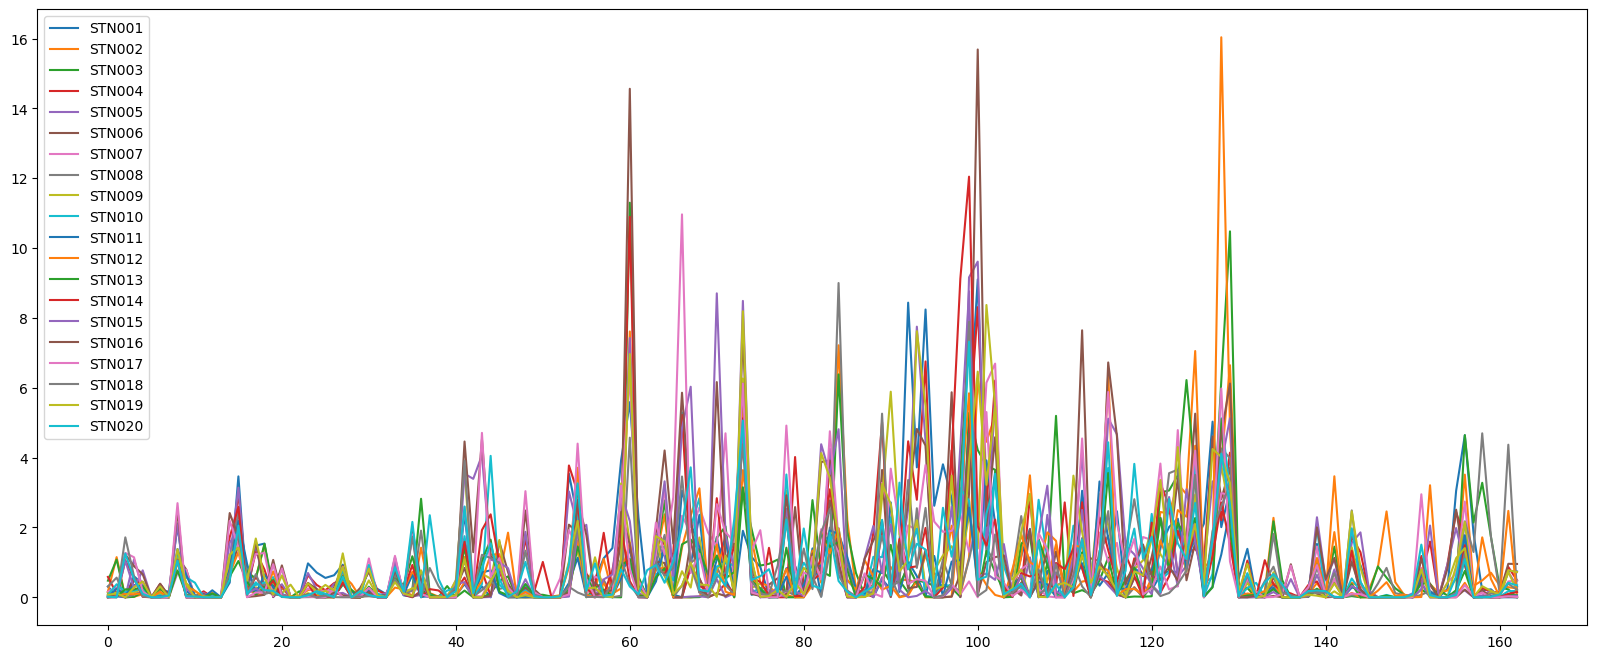

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
train_df = train_df[~(train_df["rainfall_train.vv"] == -999)]
for stn in train_df["rainfall_train.stn4contest"].unique():
    plt.plot(train_df[train_df["rainfall_train.stn4contest"] == stn].groupby(["rainfall_train.ef_month","rainfall_train.ef_day"])["rainfall_train.vv"].mean().reset_index()["rainfall_train.vv"],label=stn)
plt.legend()

### 년도별 실강수량 평균값

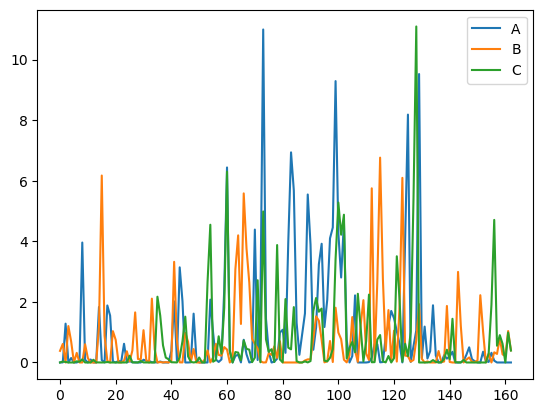

In [8]:
for y in train_df["rainfall_train.ef_year"].unique():
    plt.plot(train_df[train_df["rainfall_train.ef_year"] == y].groupby(["rainfall_train.ef_month","rainfall_train.ef_day"])["rainfall_train.vv"].mean().reset_index()["rainfall_train.vv"],label=y)
plt.legend()

## 클래스 계급별 데이터 분포

### 전체 계급별 데이터 분포

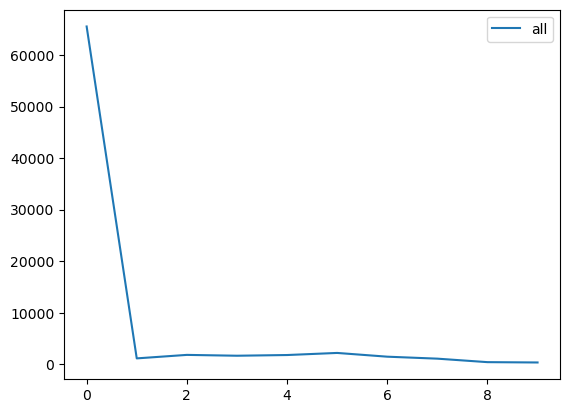

In [9]:
plt.plot(train_df.groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True), label="all")
plt.legend()

### 년도별 강수계급 데이터 분포 

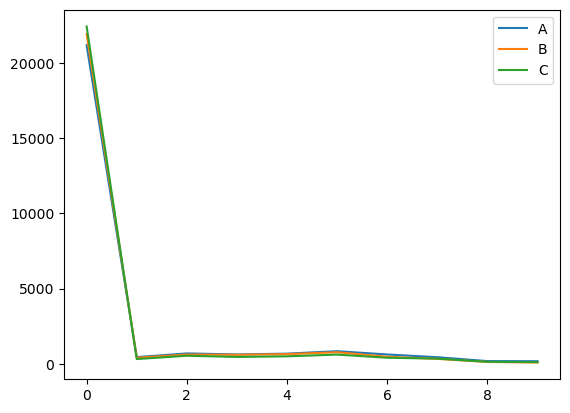

In [10]:
tmp_data = pd.concat([train_df[train_df["rainfall_train.ef_year"] == "A"].groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True),train_df[train_df["rainfall_train.ef_year"] == "B"].groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True),train_df[train_df["rainfall_train.ef_year"] == "C"].groupby(["rainfall_train.class_interval"])[["rainfall_train.class_interval"]].count().reset_index(drop=True)],axis=1)
tmp_data.columns = ["A","B","C"]

for i in tmp_data.columns:
    plt.plot(tmp_data[i],label=i)
plt.legend()


### 지점별 강수 계급 데이터 분포

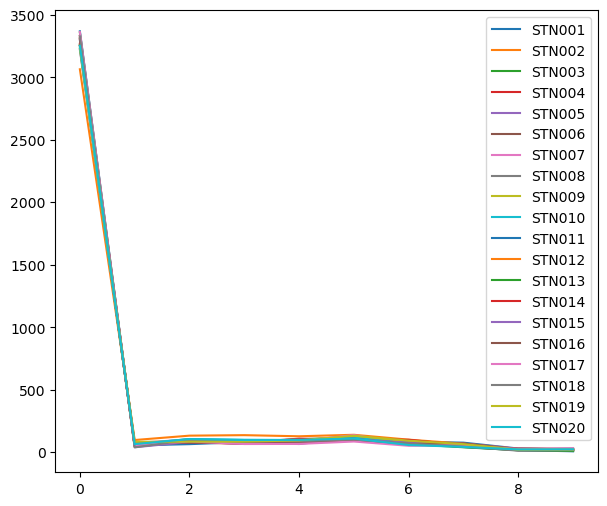

In [11]:
plt.figure(figsize=(7,6))

stn_data = pd.DataFrame()
for stn in train_df["rainfall_train.stn4contest"].unique():
    stn_data = pd.concat([stn_data, train_df[train_df["rainfall_train.stn4contest"] == stn].groupby(by="rainfall_train.class_interval")[["rainfall_train.class_interval"]].count().reset_index(drop=True)],axis=1)
stn_data.columns = [i for i in train_df["rainfall_train.stn4contest"].unique()]

for stn in stn_data.columns:
    plt.plot(stn_data[stn], label=stn)
plt.legend()


### 무강수/강수 데이터 분포도

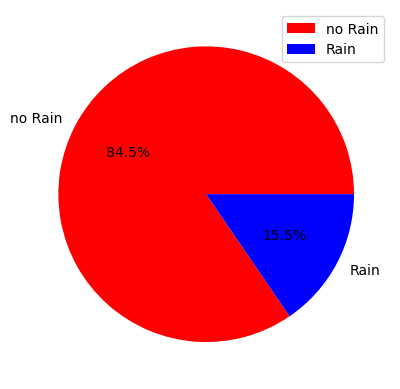

In [12]:
data = [train_df[train_df["rainfall_train.class_interval"] == 0]["rainfall_train.class_interval"].count(), train_df[train_df["rainfall_train.class_interval"] != 0]["rainfall_train.class_interval"].count()]
plt.pie(data, colors=["#FF0000","#0000FF"], labels=["no Rain", "Rain"], autopct="%1.1f%%")
plt.legend()


### 강수 클래스 계급별 데이터 분포

**전체 데이터 분포**

([<matplotlib.patches.Wedge at 0x25e805c2ee0>,
 [Text(1.050578211713308, 0.3260144491786647, 'V01'),
  Text(0.5180754878451338, 0.9703596183343713, 'V02'),
  Text(-0.45263690078211355, 1.0025566497960916, 'V03'),
  Text(-1.068654011564116, 0.26072706719464733, 'V04'),
  Text(-0.7583151542205573, -0.7968425985597485, 'V05'),
  Text(0.2236052064610185, -1.077033291799063, 'V06'),
  Text(0.8471821593897406, -0.7016283836987615, 'V07'),
  Text(1.052440623851046, -0.31995114200143343, 'V08'),
  Text(1.0952683876582834, -0.10191741262622617, 'V09')],
 [Text(0.5730426609345315, 0.17782606318836255, '9.6%'),
  Text(0.28258662973370935, 0.5292870645460207, '15.2%'),
  Text(-0.2468928549720619, 0.546849081706959, '13.9%'),
  Text(-0.5829021881258815, 0.14221476392435306, '15.0%'),
  Text(-0.41362644775666757, -0.4346414173962264, '18.4%'),
  Text(0.12196647625146462, -0.5874727046176706, '12.3%'),
  Text(0.46209935966713117, -0.3827063911084153, '9.1%'),
  Text(0.5740585221005705, -0.17451880472

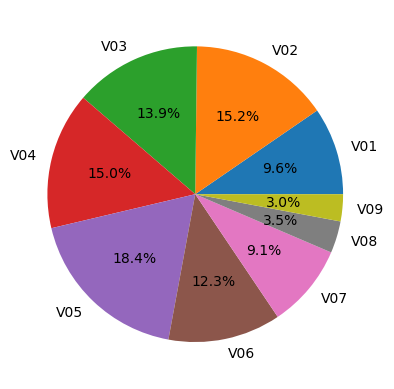

In [13]:
rainfall_train = train_df[train_df["rainfall_train.class_interval"] !=0]

plt.pie(rainfall_train.groupby("rainfall_train.class_interval")["rainfall_train.class_interval"].count(),labels=[ "V{:02d}".format(i) for i in range(1,10)], autopct="%1.1f%%")

**지점별 데이터 분포**

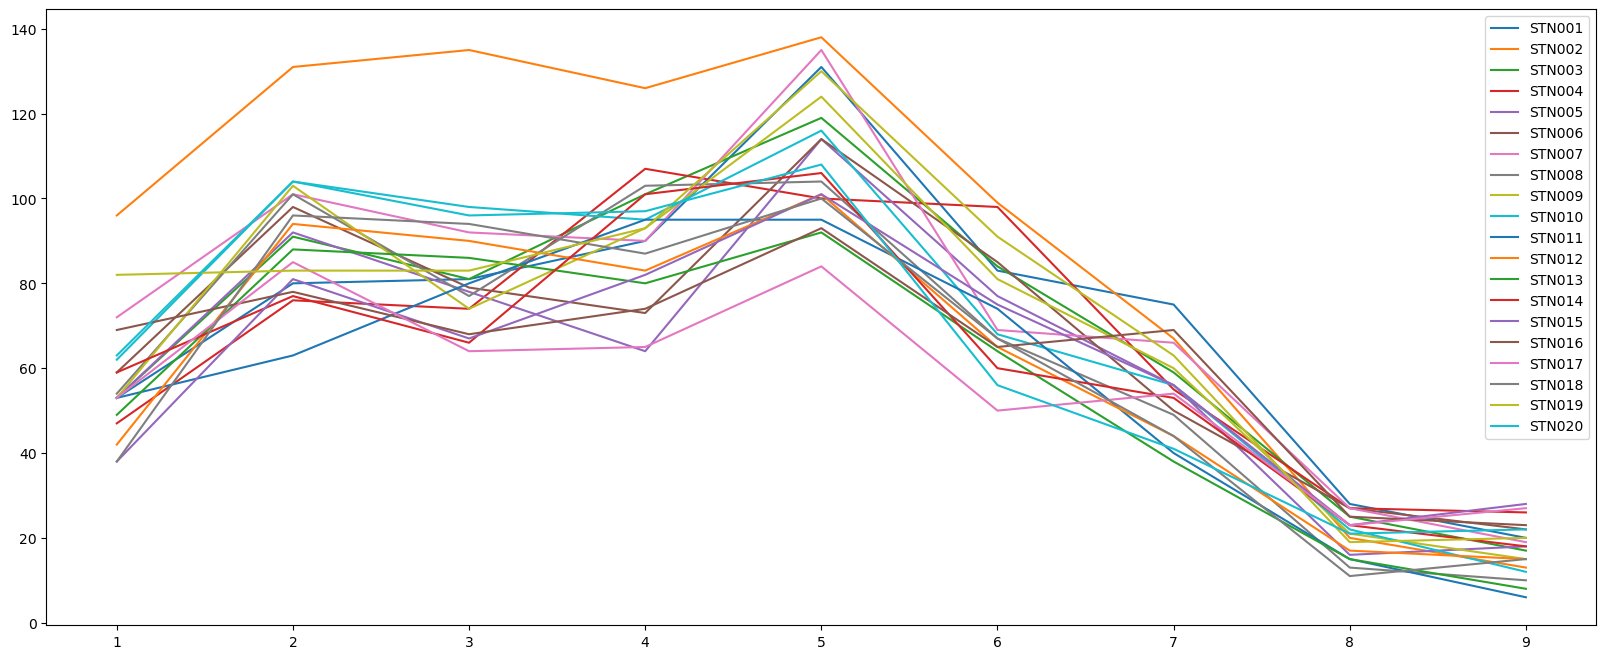

In [14]:
plt.figure(figsize=(20,8))
for stn in rainfall_train["rainfall_train.stn4contest"].unique():
    plt.plot(rainfall_train[rainfall_train["rainfall_train.stn4contest"] == stn].groupby("rainfall_train.class_interval")["rainfall_train.class_interval"].count(),label=stn)
plt.legend()

**년도별 데이터 분포**

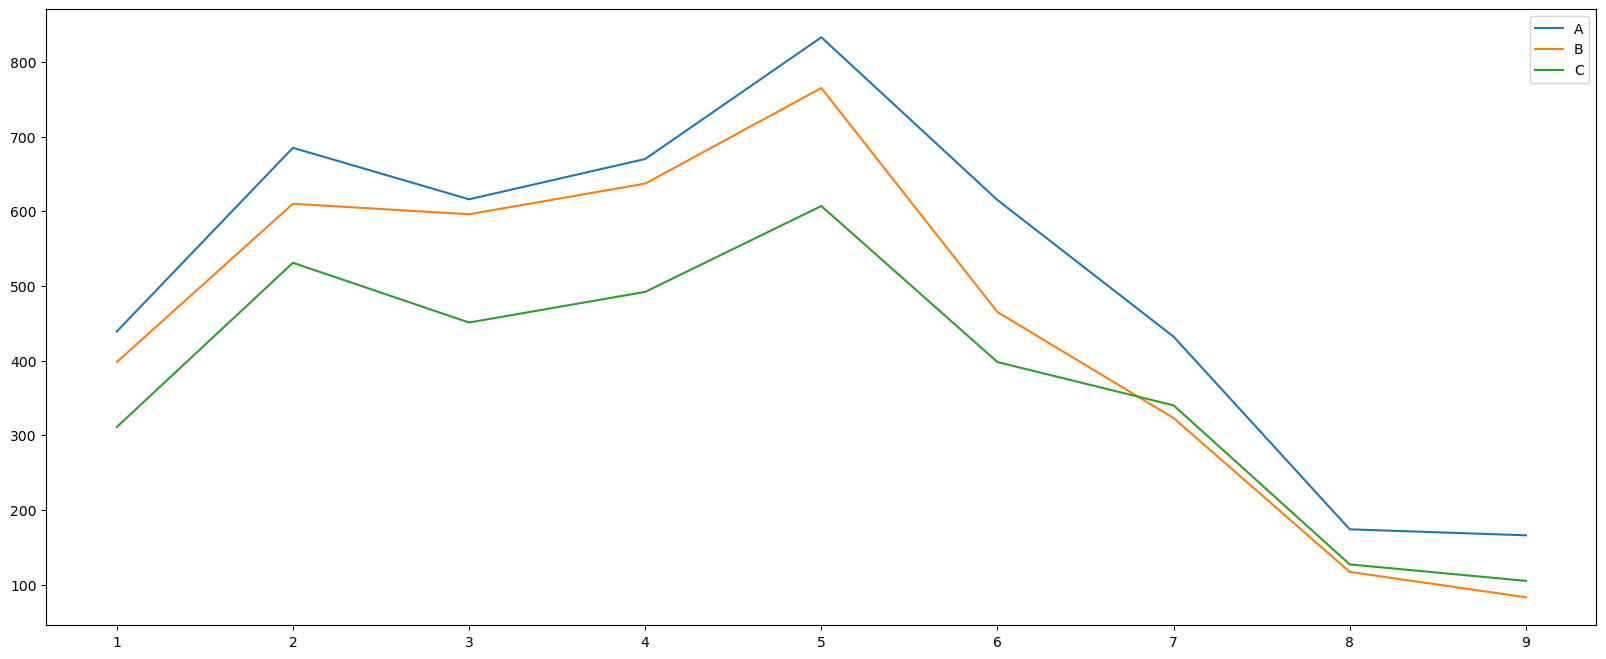

In [15]:
plt.figure(figsize=(20,8))
for y in rainfall_train["rainfall_train.ef_year"].unique():
    plt.plot(rainfall_train[rainfall_train["rainfall_train.ef_year"] == y].groupby("rainfall_train.class_interval")["rainfall_train.class_interval"].count(),label=y)
plt.legend()

**지점/년도별 강수 데이터 분포**

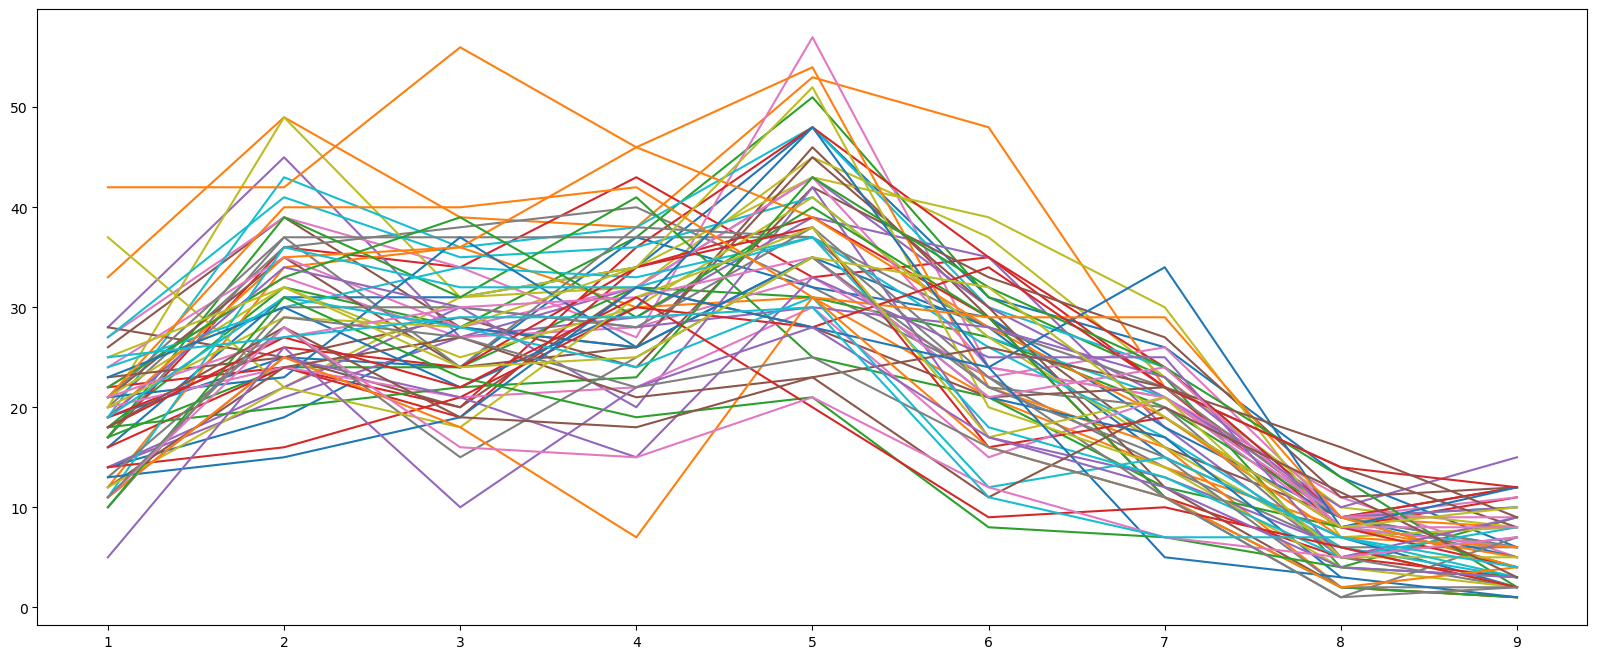

In [16]:
plt.figure(figsize=(20,8))
for y in rainfall_train["rainfall_train.ef_year"].unique():
    for stn in rainfall_train["rainfall_train.stn4contest"].unique():
        plt.plot(rainfall_train[(rainfall_train["rainfall_train.ef_year"] == y) & (rainfall_train["rainfall_train.stn4contest"] == stn)].groupby("rainfall_train.class_interval")["rainfall_train.class_interval"].count(),label=" ".join([y,stn]))

### 월에 따른 강수 데이터 분포도 확인


**무강수 포함 데이터**

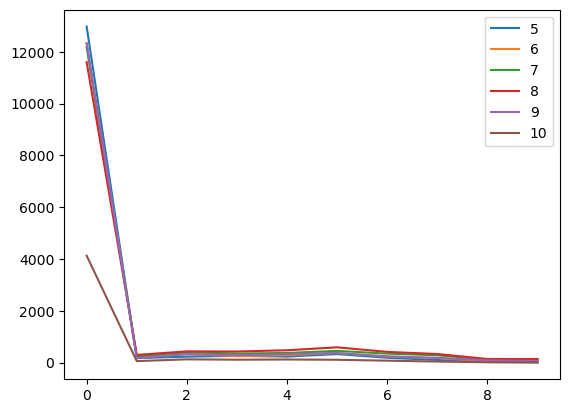

In [17]:

for idx, m in enumerate(train_df["rainfall_train.ef_month"].unique()):
    r,c = idx //2, idx %2
    plt.plot(train_df[train_df["rainfall_train.ef_month"] == m].groupby("rainfall_train.class_interval")["rainfall_train.class_interval"].count(), label=m)
plt.legend()


**강수 클래스 데이터만**

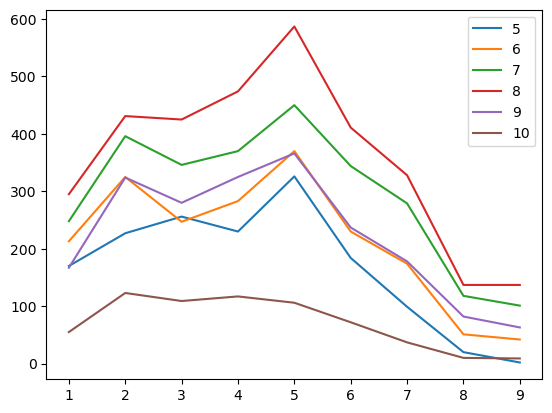

In [ ]:

for idx, m in enumerate(rainfall_train["rainfall_train.ef_month"].unique()):
    r,c = idx //2, idx %2
    plt.plot(rainfall_train[rainfall_train["rainfall_train.ef_month"] == m].groupby("rainfall_train.class_interval")["rainfall_train.class_interval"].count(), label=m)
plt.legend()


In [22]:
train_df

,rainfall_train.stn4contest,rainfall_train.dh,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.v01,rainfall_train.v02,rainfall_train.v03,rainfall_train.v04,rainfall_train.v05,rainfall_train.v06,rainfall_train.v07,rainfall_train.v08,rainfall_train.v09,rainfall_train.vv,rainfall_train.class_interval,flag
0,STN001,3,A,5,1,12,0,0,0,0,0,0,0,0,0,0.0,0,3
1,STN001,6,A,5,1,15,0,0,0,0,0,0,0,0,0,0.0,0,6
2,STN001,9,A,5,1,18,0,0,0,0,0,0,0,0,0,0.0,0,9
3,STN001,12,A,5,1,21,0,0,0,0,0,0,0,0,0,0.0,0,12
80,STN001,3,A,5,2,0,0,0,0,0,0,0,0,0,0,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,STN020,228,C,10,10,9,9,7,2,2,0,0,0,0,0,0.5,3,228
1457248,STN020,231,C,10,10,12,13,9,5,3,1,0,0,0,0,0.0,0,231
1457249,STN020,234,C,10,10,15,13,9,5,3,1,0,0,0,0,1.9,4,234
1457250,STN020,237,C,10,10,18,8,6,4,2,2,0,0,0,0,1.9,4,237
